Task 1: EDA

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('titanic3.xls')

#show the first 5 rows of the dataframe
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
print(df.info())  # Summary of columns, data types, and non-null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [5]:
print(df.describe())  # Count, mean, std, min, max, quartiles


            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


In [6]:
print(df.describe(include=['object']))  # Summary of categorical columns


                        name   sex    ticket        cabin embarked boat  \
count                   1309  1309      1309          295     1307  486   
unique                  1307     2       939          186        3   28   
top     Connolly, Miss. Kate  male  CA. 2343  C23 C25 C27        S   13   
freq                       2   843        11            6      914   39   

           home.dest  
count            745  
unique           369  
top     New York, NY  
freq              64  


In [8]:
print(df.isnull().sum())  # Count missing values per column


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


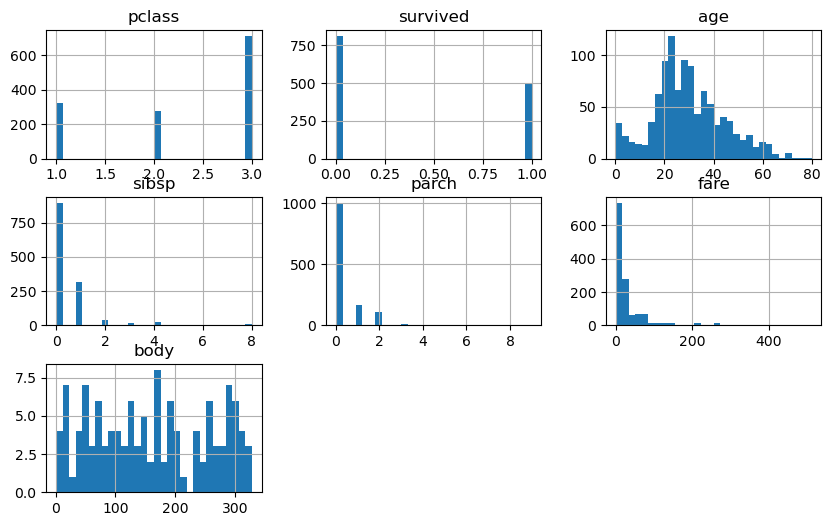

In [12]:
df.hist(figsize=(10, 6), bins=30)
plt.show()


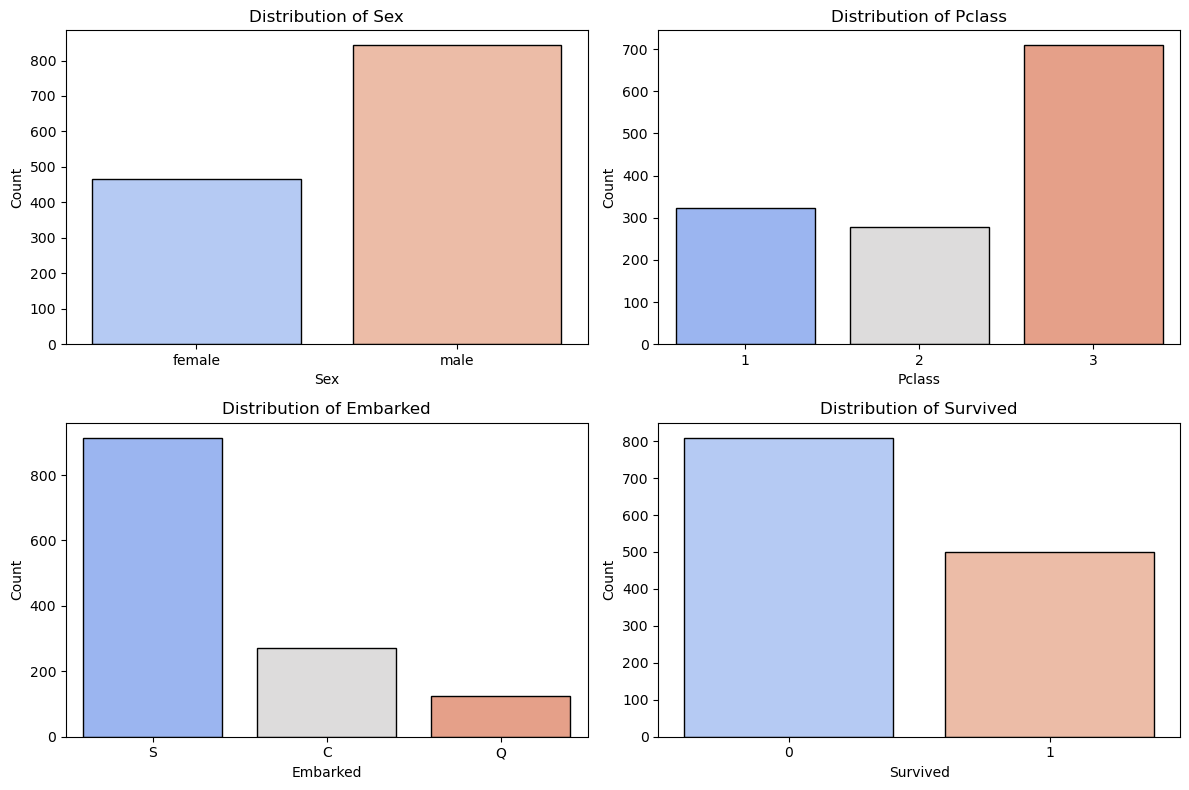

In [15]:
# Count plots for categorical variables
categorical_cols = ['sex', 'pclass', 'embarked', 'survived']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[col], palette='coolwarm', edgecolor='black')
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


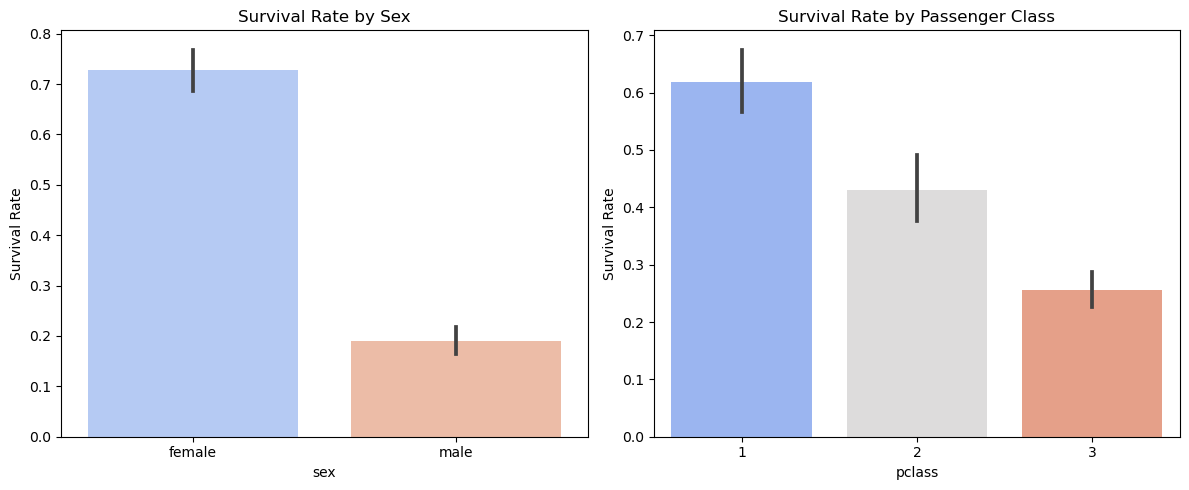

In [18]:
plt.figure(figsize=(12, 5))

# Survival by Sex
plt.subplot(1, 2, 1)
sns.barplot(x="sex", y="survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")

# Survival by Pclass
plt.subplot(1, 2, 2)
sns.barplot(x="pclass", y="survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")

plt.tight_layout()
plt.show()
